In [1]:
import tomllib
import numpy as np
from pprint import pprint
import librosa
import requests
from pydub import AudioSegment
from io import BytesIO
from SpotifyTrack import SpotifyTrack
from poc_test import estimate_tempo
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import scipy
import scipy.stats
import matplotlib.pyplot as plt


with open("cfg.toml", "rb") as cfg:
    keys = tomllib.load(cfg)["spotify"]
    c_id = keys["client_id"]
    c_secret = keys["client_secret"]
    auth_manager = SpotifyClientCredentials(client_id=c_id, client_secret=c_secret)
    
sp = spotipy.Spotify(auth_manager=auth_manager)

In [2]:
def compute_energy(audio_file_path, graph=False):
    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=None)  # y: waveform, sr: sampling rate

    # Calculate RMS energy
    rms = librosa.feature.rms(y=y)[0]

    # Convert RMS to decibels
    rms_db = 20 * np.log10(rms + 1e-6)  # Add small constant to avoid log(0)

    # Plot RMS in dB
    if graph == True:
        plt.figure(figsize=(12, 6))
        plt.plot(rms_db, label='RMS Energy (dB)', color='blue')
        plt.title('Energy of Song in dB')
        plt.xlabel('Frames')
        plt.ylabel('Energy (dB)')
        plt.legend()
        plt.show()

    # Overall average energy
    average_energy_db = np.mean(rms_db)
    print(f"Average Energy of the Song: {average_energy_db:.2f} dB")
    return average_energy_db

In [ ]:
def get_song_name(track_id):
    #fetch ALL INFO. 
    info = sp.track(track_id)
    return info["name"]

def get_track_id(song_name):
    r = sp.search(q = song_name, type = "track", limit = 1)
    track = r.get("tracks", {}).get("items", [])
    if track: return track[0]['id']
    return f"Did not find {song_name}"

def get_features(audio_file_path):
    name = audio_file_path.replace("wavs/", "")
    track_id = get_track_id(name)
    features = sp.audio_features(track_id)
    return features

def disp_spotify_loudness(features):
    if features != [None]:print(f"Spotify's loudness measure: {features[0].get("loudness")} dB")
    else:print(f"Spotify's failed to compute any features for this track")

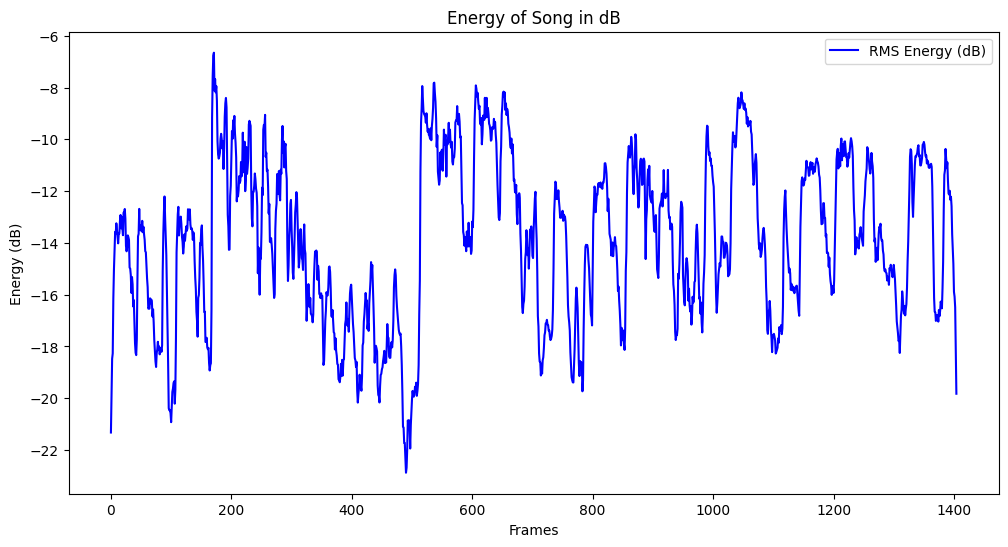

Average Energy of the Song: -13.87 dB
Spotify's loudness measure: -13.186 dB


In [4]:
input = "wavs/WhatHaveTheyDoneToUs(fromtheseriesArcaneLeagueofLegends).wav"
compute_energy(input, graph=True)
f = get_features(input)
disp_spotify_loudness(f)


In [6]:
from pathlib import Path
folder_path = Path("wavs")
for file in folder_path.iterdir():
    if file.is_file():
        f = file.as_posix()
        name = f.replace("wavs/", "")
        id = get_track_id(name)
        print(f"Current Song: {get_song_name(id)}")
        compute_energy(f)
        disp_spotify_loudness(get_features(f))
        print("")


Current Song: Morning 505 - Mixed
Average Energy of the Song: -10.81 dB
Spotify's loudness measure: -16.647 dB

Current Song: Aguacero - Instrumental
Average Energy of the Song: -14.94 dB
Spotify's loudness measure: -10.611 dB

Current Song: Aguacero - Instrumental
Average Energy of the Song: -13.49 dB
Spotify's loudness measure: -10.611 dB

Current Song: 愛を感じて (Guitar Ver.) 『ライオン・キング』より
Average Energy of the Song: -12.44 dB
Spotify's loudness measure: -7.34 dB

Current Song: Huu
Average Energy of the Song: -11.09 dB
Spotify's loudness measure: -9.32 dB

Current Song: Waves of Joy
Average Energy of the Song: -16.45 dB
Spotify's loudness measure: -13.741 dB

Current Song: Binaural Alpha Waves 108-116 Hz
Average Energy of the Song: -13.34 dB
Spotify's loudness measure: -34.69 dB

Current Song: time
Average Energy of the Song: -10.64 dB
Spotify's loudness measure: -3.879 dB

Current Song: Blind Earth B Delta (92-96hz)
Average Energy of the Song: -16.28 dB
Spotify's loudness measure: -41.5

AttributeError: 'NoneType' object has no attribute 'get'